In [4]:
import numpy as np
import matplotlib.pyplot as plt

# qubit_spec_20230801

Resonance spectroscopy: invio segnale a freq diverse. se segnale e freq a caso passa qubit indisturbato. se invece va risonanza col risonatore prende energia dal segnale, allora avrò picco verso il basso.

Risonatore 2d ha due risonatori che vede passagio di fotoni da una parte all'altra quando cìè risonanza.
Con rison spectroscopy si capisce ... TO BE UNDERSTOOD

qubit spectroscopy : mando segnal a canale di drive e poi mando freq caratteristica del risonatore per misurare punto piu in basso del picco.


In [7]:
# C:\Users\oper\SynologyDrive\Lab2023\Qubit\data\qubit_spectroscopy\qubit_spec_20230801\data\qubit spectroscopy_0\data.npz

file = np.load("C:\\Users\\fsfinardi\\Documents\\01_Personali\\Università-2324\\LabCrio\\data\\qubit_spectroscopy\\qubit_spec_20230801\\data\\qubit spectroscopy_0\\data.npz")
# file = np.load("C:\\Users\\oper\\SynologyDrive\\Lab2023\\Qubit\\data\\qubit_spectroscopy\\qubit_spec_20230801\\data\\qubit spectroscopy_0\\data.npz")
print(file.files)

['D1', 'D2', 'D3']


[('freq', '<f8'), ('msr', '<f8'), ('phase', '<f8')]


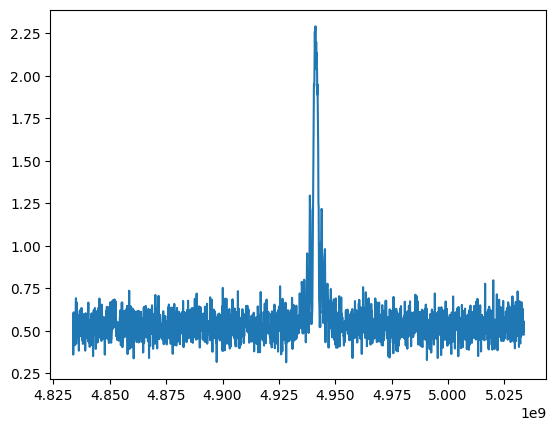

In [8]:
D1 = file['D1']
D2 = file['D2']
D3 = file['D3']

print(D1.dtype)
D1_freq = D1['freq']
D1_msr = D1['msr']
D1_phase = D1['phase']

plt.plot(D1_freq, D1_msr)



Qui misuro risonatore accoppiato a uno dei due stati, in funzione della freq inviata  al Qubit. Ricordarsi SHIFT DEL RISONATORE

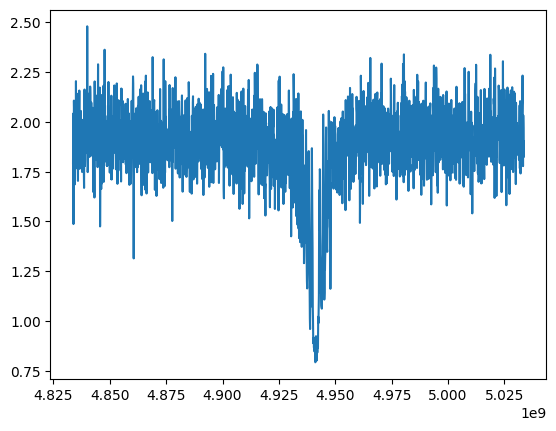

In [9]:
plt.plot(D1_freq, D1_phase)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 262.3 (χ²/ndof = 0.1)      │              Nfcn = 592              │
│ EDM = nan (Goal: 0.0002)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

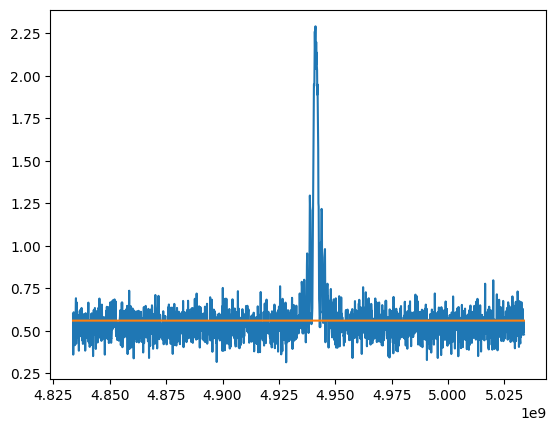

In [69]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

def Lorentzian(x, p):
    return p[0] / (1 + ((x - p[1])/p[2])**2) + p[3]

cost = LeastSquares(D1_freq, D1_msr, 0.5, Lorentzian)
# Amplitude, x0, Gamma, Minimum
par = [4.9e9, 1, 0.1, 0.4]
m = Minuit(cost, par)
result = m.migrad()

print(result)

par_opt = [result.values[f'x{i}'] for i in range(len(result.values))]

# plt.plot(D1_freq, D1_msr)   
plt.plot(D1_freq, Lorentzian(D1_freq, par_opt))
print(len(Lorentzian(D1_freq, par_opt)))
# x = np.arange(0,100)
# plt.plot(Lorentzian(x, par))
